In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SoraSpace769/CC5206_steam_games/GMatamoro/data/steam_ready2.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,appid,name,developer,publisher,price,year,duenos_promedio,rating_neto,rating_perc,Action,...,Casual,Simulation,Racing,Violent,Massively Multiplayer,Nudity,Sports,Early Access,Gore,Sexual Content
0,10,Counter-Strike,Valve,Valve,7801,2000,15000000.0,121195,0.973888,1,...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,Valve,Valve,4329,1999,7500000.0,2685,0.839787,1,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,Valve,Valve,4329,2003,7500000.0,3018,0.895648,1,...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,Valve,Valve,4329,2001,7500000.0,1006,0.826623,1,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,4329,1999,7500000.0,4962,0.947996,1,...,0,0,0,0,0,0,0,0,0,0


La idea es encontrar una función, donde la salida sea el precio de los juegos, y las entradas los dueños promedio, rating neto y rating porcentual.

In [3]:
# Separación de features y labels
features = df[["duenos_promedio","rating_neto","rating_perc"]]
labels = df["price"].to_numpy()

In [4]:
# Normalización de conjuntos
X =(features-features.mean())/features.std()
y =(labels-labels.mean())/labels.std()
X.head()

,duenos_promedio,rating_neto,rating_perc
0,11.167003,7.522544,1.110130
1,5.533092,0.118359,0.536096
2,5.533092,0.139164,0.775212
3,5.533092,0.013460,0.479746
4,5.533092,0.260620,0.999294


## Regresión con Modelo Lineal (Mínimos Cuadrados)

Se intentará una regresión lineal simple sobre los datos.

In [33]:
reg_linear = LinearRegression().fit(X, y)
print("Coeficientes:", reg_linear.coef_)
print("R^2:", reg_linear.score(X,y))

Coeficientes: [0.02556199 0.01639437 0.08738829]
R^2: 0.009372538088601612


## Regresión con Random Forest

Se probará con distinta profundidad máxima, para observar el desempeño del algoritmo usando la métrica $R^2$.

In [16]:
depths_rf = np.arange(1, 40, step=1)
r2_scores_rf = np.zeros_like(depths_rf, dtype=np.float16)
for i in range(len(depths_rf)):

    regr_rf = RandomForestRegressor(max_depth=depths_rf[i], random_state=0)
    regr_rf.fit(X, y)
    #regr_rf.predict(X)
    r2_scores_rf[i] = regr_rf.score(X,y)

In [21]:
print("Máximo R^2:", max(r2_scores_rf))

Máximo R^2: 0.645


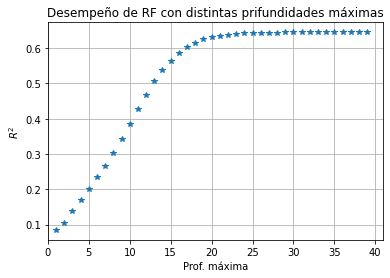

In [17]:
plt.plot(depths_rf, r2_scores_rf, "*")
plt.grid(True)
plt.title("Desempeño de RF con distintas prifundidades máximas")
plt.xlabel("Prof. máxima")
plt.ylabel("$R^2$")
plt.xlim(left=0)
plt.show()

## Regresión con KNN

Se probará con distinta cantidad de vecinos, y así observar el desempeño del algoritmo en base a la métrica $R^2$.

In [ ]:
neigh_knn = np.arange(1, 21, step=1)
r2_scores_knn = np.zeros_like(neigh_knn, dtype=np.float16)
for i in range(len(neigh_knn)):

    regr_knn = KNeighborsRegressor(n_neighbors=neigh_knn[i])
    regr_knn.fit(X, y)
    #regr_knn.predict(X)
    r2_scores_knn[i] = regr_knn.score(X,y)

In [22]:
print("Máximo R^2:", max(r2_scores_knn))

Máximo R^2: 0.4883


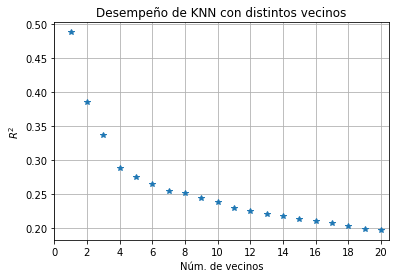

In [30]:
plt.plot(neigh_knn, r2_scores_knn, "*")
plt.grid(True)
plt.title("Desempeño de KNN con distintos vecinos")
plt.xlabel("Núm. de vecinos")
plt.ylabel("$R^2$")
plt.xlim(0,20.5)
plt.xticks(np.arange(0, max(neigh_knn)+1, 2.0))
plt.show()